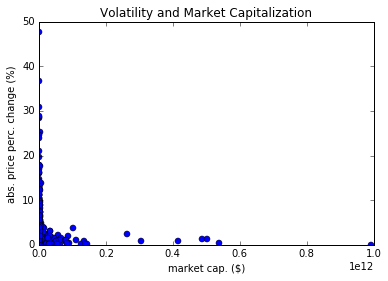

In [4]:
# Pierre Mabille
# N10017621
# Python program downloading data on stock price changes from Yahoo Finance
# and plotting them against market cpaitalizations from given list of companies

# plot in the notebook
%matplotlib inline 
# import modules 
import matplotlib.pyplot as plt # module for graphs
import requests # module for urls
import re # module for regular expressions

# preallocate lists for data extraction from csv (txt) file. will be lists of strings
Symbol=[] 
Name=[] 
Market_cap0=[]

data_file = open('company_list_corrected.txt', 'r')
for line in data_file:
    line = line.replace('\n','') # remove line separator \n from txt file
    
    s, n, mc = re.split('",|N/A,N/A', line) # split the line in 3, when separated by '",' or by 'N/A,N/A'
    # append each of these 3 parts to the pre-allocated lists
    Symbol.append(s)
    Name.append(n)
    Market_cap0.append(mc)
data_file.close()

Market_cap=Market_cap0[1:] # remove headers

MC=[] # preallocate list of float to store market cap
for mc in Market_cap:
    if mc.endswith('M'): # if this string value of Market_cap ends with M, then replace M by 000000
        mc=mc.replace('M','000000')
        mc1=float(mc)*1e6 # convert the modified string to float
    elif mc.endswith('B'): # same for B
        mc=mc.replace('B','000000000')
        mc1=float(mc)*1e9
    elif mc.endswith('N/A'):  # sane for N/A (need nan for conversion to float)
        mc=mc.replace('N/A','nan')
        mc1=float(mc)
    elif mc.endswith('00'):
        mc1=float(mc)
    MC.append(mc1)
    
# MC=MC[0:10] # truncate market cap list (faster computation)
    
Symbol=Symbol[1:]
Symbol=[symb.replace('"','') for symb in Symbol]

# Symbol=Symbol[0:10]
price_pchange=[]
url_pattern='http://finance.yahoo.com/d/quotes.csv?s={}&f=p2'
for s in range(len(Symbol)):
    url=url_pattern.format(Symbol[s])
#     print(url)
    r=requests.get(url)
#     print(r.text)
    a=r.text
    a=a.replace('\n','')
    a=a.replace('N/A','nan')
    a=a.replace('%','')
    a=a.replace('"','')
    s=float(a)
    price_pchange.append(s)
# print(price_pchange)
abs_price_pchange=[abs(p) for p in price_pchange]

# plot abs value of perc change in price against market cap
fig, ax = plt.subplots()
ax.plot(MC,abs_price_pchange,'o')
ax.set_title('Volatility and Market Capitalization')
ax.set_xlabel('market cap. ($)')
ax.set_ylabel('abs. price perc. change (%)')
plt.show()

# lower cap stocks are more volatile according to this dataset and this measure

